# CelebA Validation EfficientNet

In [15]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial
from sklearn.metrics import mean_squared_error
    
import mydata
import performance
from performance import PerformanceMeasure, PerformanceOptimisation

# UTKFace

In [16]:
db = "UTKFace"
root = f"../../dataset/AAAI 2025/{db}/"
df_valid_ef3 = mydata.load_and_process_csv(f"{root}evaluation/df_valid_efficientnet.csv", True)
df_valid_resnet = mydata.load_and_process_csv(f"{root}evaluation/df_valid_resnet.csv", True)
df_valid_vgg = mydata.load_and_process_csv(f"{root}evaluation/df_valid_vgg.csv", True)
efficientnet_save_file = f"{root}model/pickle/polynomial_model_efficientnet.pkl"
resnet_save_file = f"{root}model/pickle/polynomial_model_resnet.pkl"
vgg_save_file = f"{root}model/pickle/polynomial_model_vgg.pkl"

In [17]:
po_efficientnet = PerformanceOptimisation(df_valid_ef3, db, "Efficientnet")
po_resnet = PerformanceOptimisation(df_valid_resnet, db, "ResNet")
po_vgg = PerformanceOptimisation(df_valid_vgg, db, "VGG")

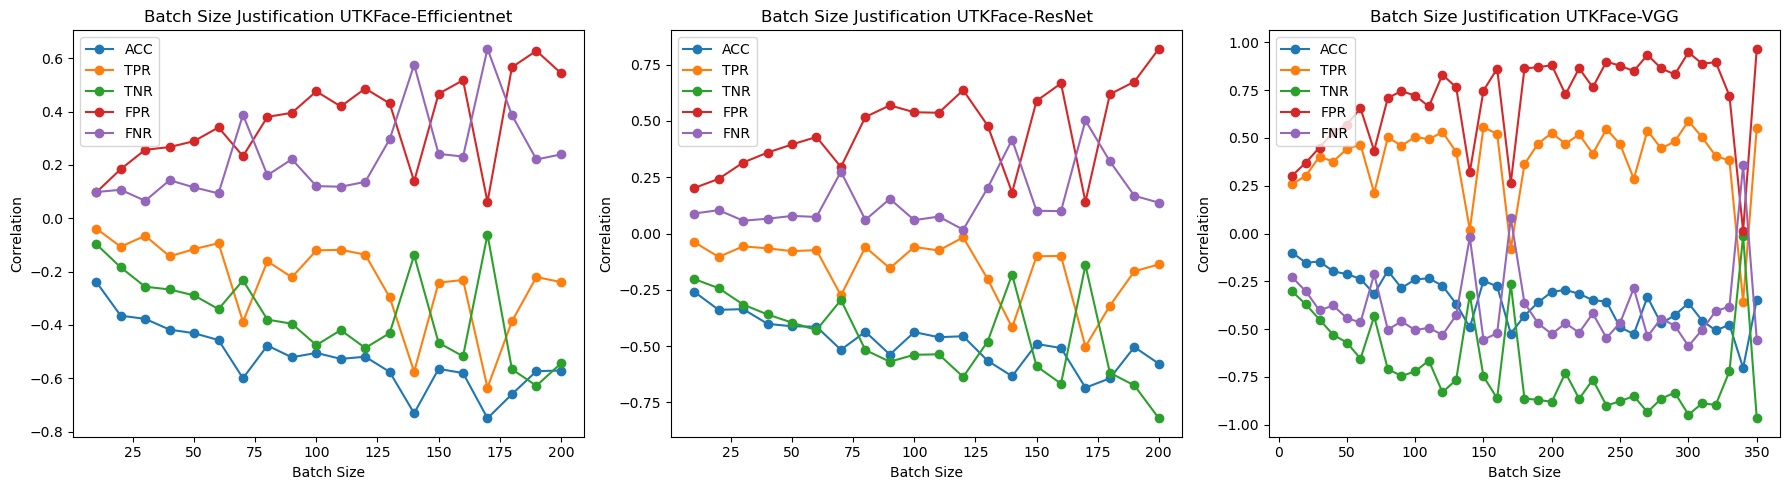

In [18]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=UserWarning) # To adovid error message related one labels
    
    fig, ax = plt.subplots(1, 3, figsize=(18, 5))
    po_efficientnet.check_batch_size(ax[0])
    po_resnet.check_batch_size(ax[1])
    po_vgg.check_batch_size(ax[2], b_start = 10, b_end = 360, b_step = 10)
    plt.tight_layout()
    plt.show()

In [19]:
# Correlation check
po_efficientnet.check_optimal_batch_correlation(batch_size=110)
po_resnet.check_optimal_batch_correlation(batch_size=110)
po_vgg.check_optimal_batch_correlation(batch_size=110)

          distance       ACC       TPR       TNR       FPR       FNR
distance  1.000000 -0.527572 -0.118296 -0.419438  0.419438  0.118296
ACC      -0.527572  1.000000  0.782241  0.277978 -0.277978 -0.782241
TPR      -0.118296  0.782241  1.000000 -0.308571  0.308571 -1.000000
TNR      -0.419438  0.277978 -0.308571  1.000000 -1.000000  0.308571
FPR       0.419438 -0.277978  0.308571 -1.000000  1.000000 -0.308571
FNR       0.118296 -0.782241 -1.000000  0.308571 -0.308571  1.000000
          distance       ACC       TPR       TNR       FPR       FNR
distance  1.000000 -0.460245 -0.075194 -0.536249  0.536249  0.075194
ACC      -0.460245  1.000000  0.829129  0.529774 -0.529774 -0.829129
TPR      -0.075194  0.829129  1.000000  0.059328 -0.059328 -1.000000
TNR      -0.536249  0.529774  0.059328  1.000000 -1.000000 -0.059328
FPR       0.536249 -0.529774 -0.059328 -1.000000  1.000000  0.059328
FNR       0.075194 -0.829129 -1.000000 -0.059328  0.059328  1.000000
          distance       ACC      

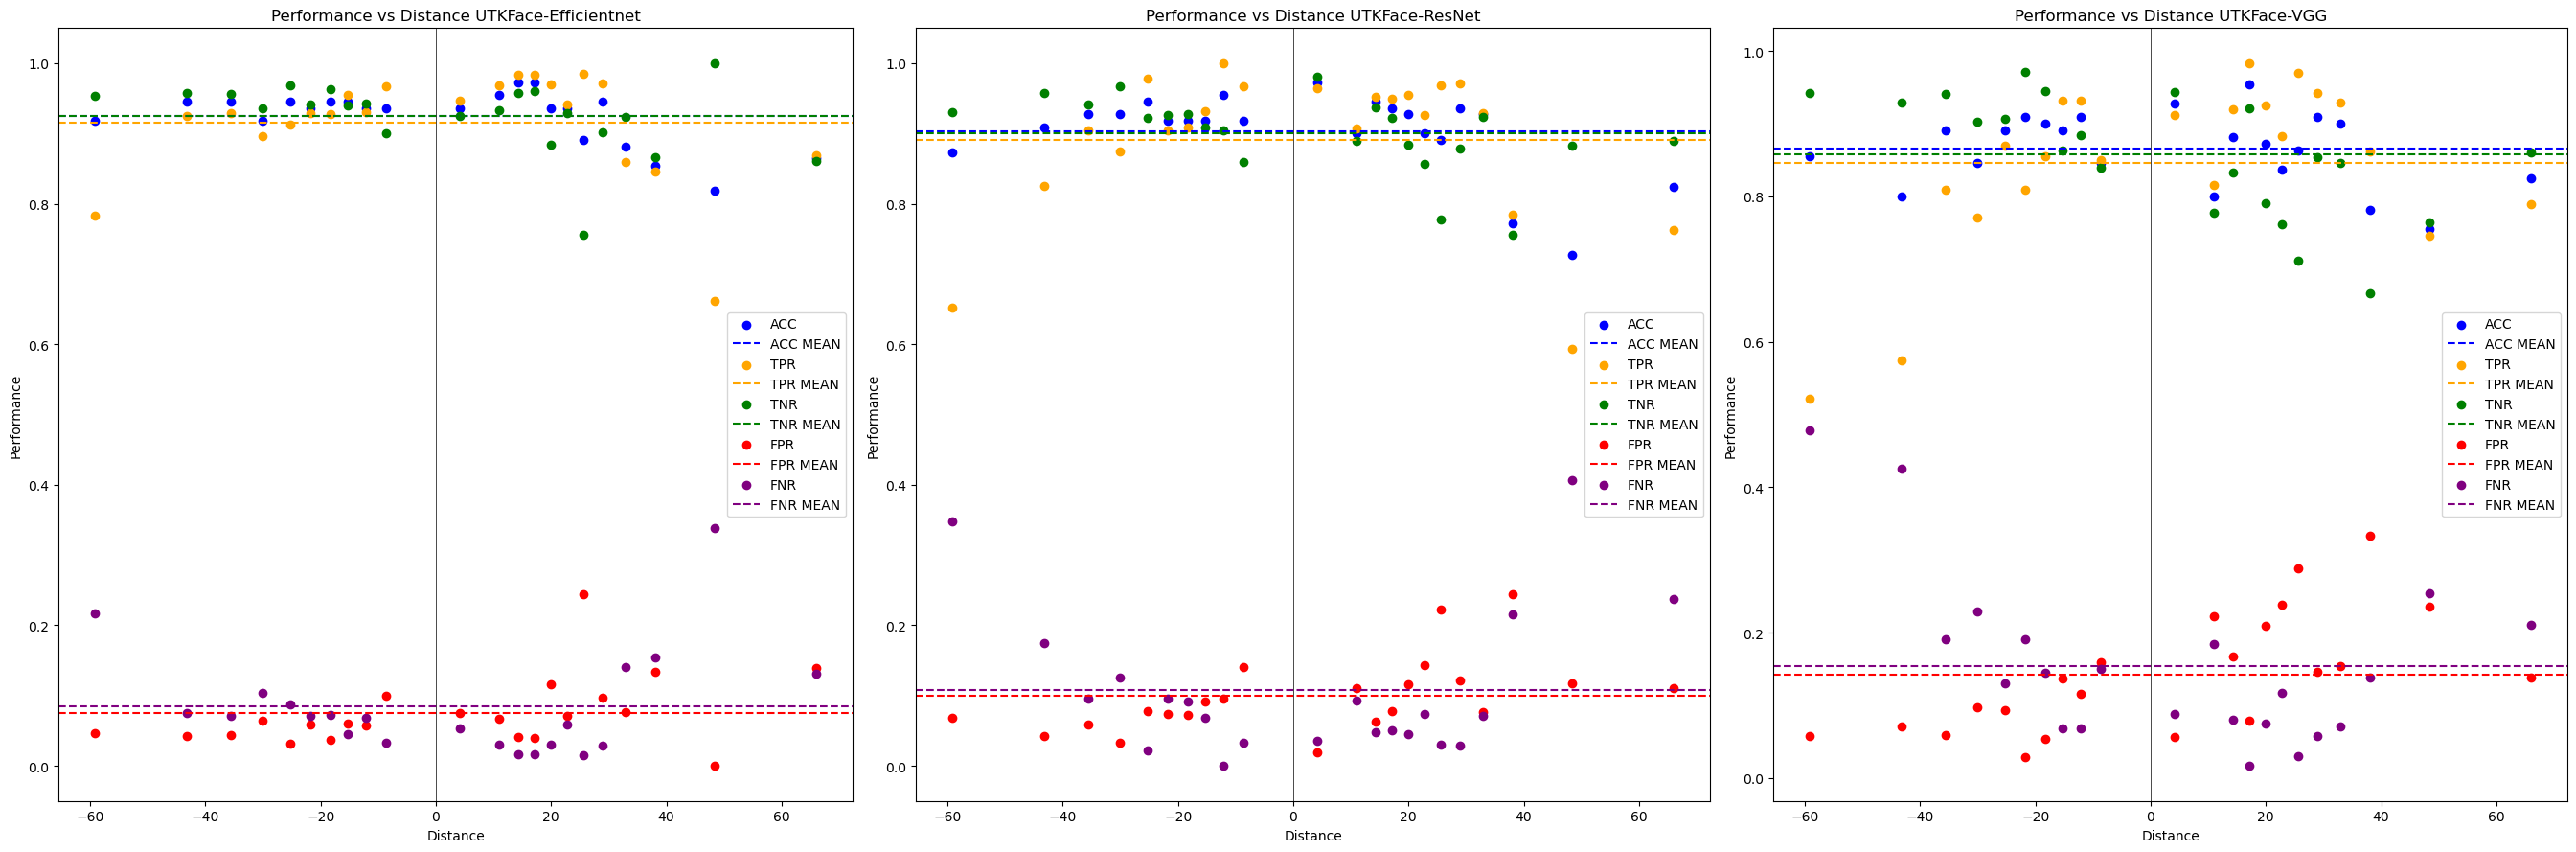

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(27, 9))
po_efficientnet.display_distance_performance(ax[0])
po_resnet.display_distance_performance(ax[1])
po_vgg.display_distance_performance(ax[2])
plt.tight_layout()
plt.show()

UTKFace - Efficientnet
Degree 1: MSE = 0.0020320672322962554
Degree 2: MSE = 0.0020318773448229823
Degree 3: MSE = 0.002016943086481772
Degree 4: MSE = 0.0019730880588396706
Degree 5: MSE = 0.001821184119676033
UTKFace - ResNet
Degree 1: MSE = 0.0020091870724475076
Degree 2: MSE = 0.002004827253444062
Degree 3: MSE = 0.001849350807918118
Degree 4: MSE = 0.0018011509726796973
Degree 5: MSE = 0.001731223696510919
UTKFace - VGG
Degree 1: MSE = 0.0036505642172785725
Degree 2: MSE = 0.0035661103798192858
Degree 3: MSE = 0.002914933421399126
Degree 4: MSE = 0.002694524756224057
Degree 5: MSE = 0.002661509528215329


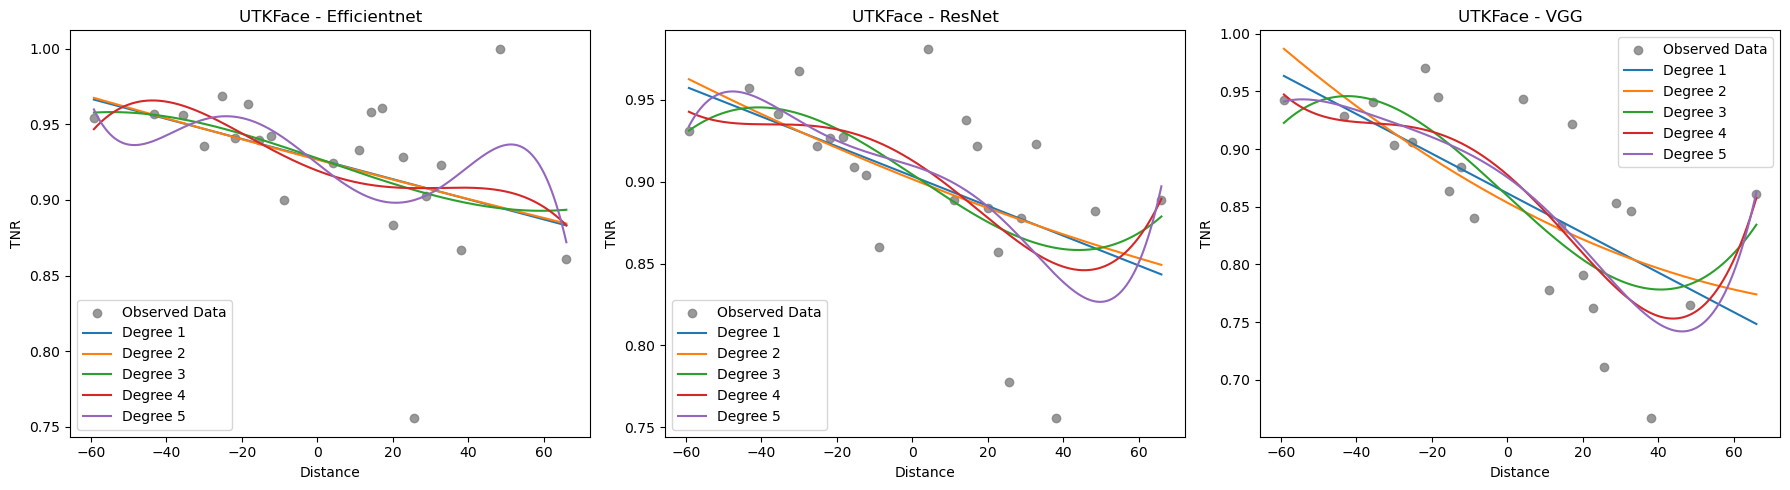

In [21]:
metric = "TNR" # Focus metric for penalty
degrees = [1, 2, 3, 4, 5]

fig, ax = plt.subplots(1, 3, figsize=(18, 5))
po_efficientnet.check_optimised_degree(metric, degrees, ax[0])
po_resnet.check_optimised_degree(metric, degrees, ax[1])
po_vgg.check_optimised_degree(metric, degrees, ax[2])

plt.tight_layout()
plt.show()

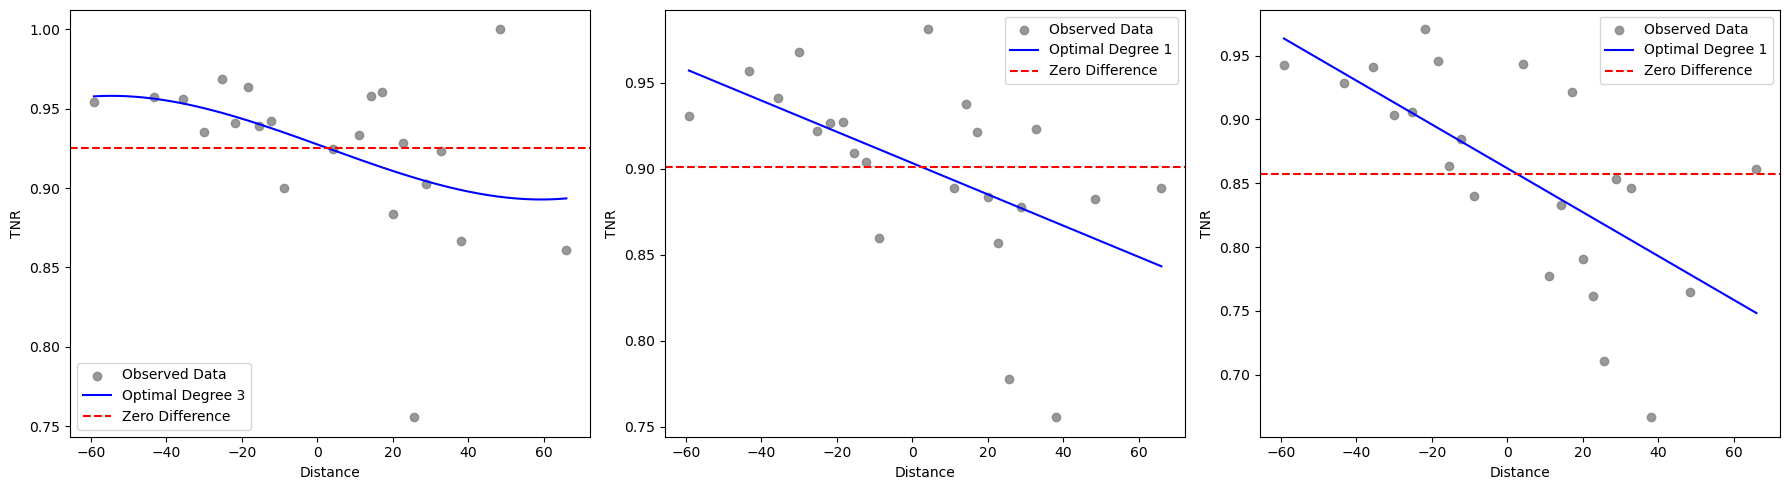

In [28]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

optimal_deg = 3
po_efficientnet.diaplay_optimal_degree(metric, optimal_deg, ax[0])

optimal_deg = 1
po_resnet.diaplay_optimal_degree(metric, optimal_deg, ax[1])

optimal_deg = 1
po_vgg.diaplay_optimal_degree(metric, optimal_deg, ax[2])

plt.tight_layout()
plt.show()

In [26]:
po_efficientnet.save_optimal_polynomial_model(efficientnet_save_file)
po_resnet.save_optimal_polynomial_model(resnet_save_file)
po_vgg.save_optimal_polynomial_model(vgg_save_file)

Modle saved
Modle saved
Modle saved


In [27]:
po_efficientnet.df_performance

,distance,ACC,TPR,TNR,FPR,FNR
0,-59.187225,0.918182,0.782609,0.954023,0.045977,0.217391
1,-43.263439,0.945455,0.925000,0.957143,0.042857,0.075000
2,-35.634404,0.945455,0.928571,0.955882,0.044118,0.071429
3,-30.117904,0.918182,0.895833,0.935484,0.064516,0.104167
4,-25.349882,0.945455,0.913043,0.968750,0.031250,0.086957
5,-21.806563,0.936364,0.928571,0.941176,0.058824,0.071429
6,-18.344523,0.945455,0.927273,0.963636,0.036364,0.072727
7,-15.350199,0.945455,0.954545,0.939394,0.060606,0.045455
8,-12.222396,0.936364,0.931034,0.942308,0.057692,0.068966
9,-8.730968,0.936364,0.966667,0.900000,0.100000,0.033333


In [42]:
import numpyro
import numpyro.distributions as dist
import jax.numpy as jnp
from numpyro import handlers
from numpyro.infer import MCMC, NUTS
import jax

def bayes(X, Y=None, degree=3):
    # 多項式特徴量を作成　共益事前分布（最終的に出てくる形）
    X_poly = jnp.column_stack([X**d for d in range(degree + 1)])
    
    # 係数の事前分布を定義
    num_features = X_poly.shape[1]
    # 学習後のモデルパラメーター
    betas = numpyro.sample('betas', dist.Normal(0, 10).expand([num_features]).to_event(1)) #betas[0] ~ Normal(0.0, 10.0),..., betas[3] ~ Normal(0.0, 10.0)
    
    # 回帰モデル(sampling)
    mu = jnp.dot(X_poly, betas)  # 予測値
    
    # 尤度の設定 (正規分布)
    sigma = numpyro.sample('sigma', dist.HalfNormal(1.0))
    numpyro.sample('Y', dist.Normal(mu, sigma), obs=Y)


# 乱数シード
#rng_key = jax.random.PRNGKey(0)

# サンプルデータ
X = po_efficientnet.df_performance["distance"]
Y = po_efficientnet.df_performance["TNR"]  # 多項回帰に基づくデータ

# モデルの定義
#model_fn = handlers.seed(bayes, rng_seed=0)

# サンプリング
nuts_kernel = NUTS(bayes)
mcmc = MCMC(nuts_kernel, num_warmup=50, num_samples=1000)
mcmc.run(rng_key, X=jnp.array(X), Y=jnp.array(Y))
trace = mcmc.get_samples()

# 結果の確認
#print(trace)


sample: 100%|███████████████████████████| 1050/1050 [00:00<00:00, 1541.80it/s, 3 steps of size 5.44e-03. acc. prob=0.16]


sample: 100%|█████████████████████████████| 600/600 [00:00<00:00, 911.24it/s, 23 steps of size 4.96e-03. acc. prob=0.30]
/home/kuniko/anaconda3/lib/python3.11/site-packages/arviz/data/base.py:265: UserWarning: More chains (500) than draws (4). Passed array should have shape (chains, draws, *shape)
  warnings.warn(


ValueError: cannot convert float NaN to integer

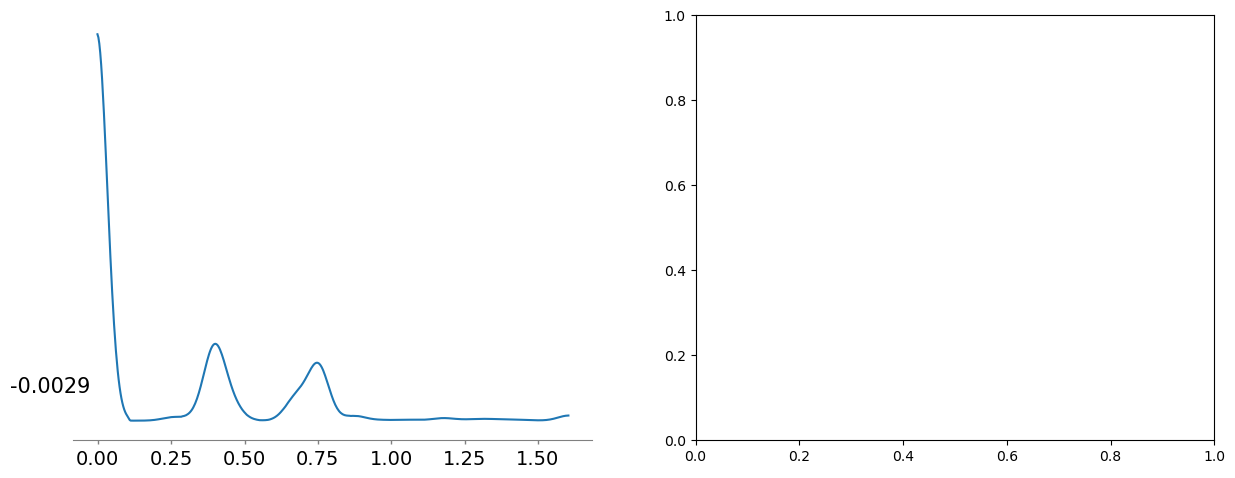

In [43]:
import arviz as az
import matplotlib.pyplot as plt

# NUTSとMCMCを定義して実行
nuts_kernel = NUTS(bayes)
mcmc = MCMC(nuts_kernel, num_warmup=100, num_samples=500)
mcmc.run(rng_key, X=jnp.array(X), Y=jnp.array(Y))

# MCMCの結果を取得
trace = mcmc.get_samples()

# Arvizのデータ形式に変換
idata = az.from_dict(posterior=trace)

# 事後分布のプロット
az.plot_posterior(idata)
plt.show()

# CelebA

In [ ]:
db = "CelebA"
root = f"../../dataset/AAAI 2025/{db}/"
df_valid_ef3 = mydata.load_and_process_csv(f"{root}evaluation/df_valid_efficientnet.csv", True)
df_valid_resnet = mydata.load_and_process_csv(f"{root}evaluation/df_valid_resnet.csv", True)
df_valid_vgg = mydata.load_and_process_csv(f"{root}evaluation/df_valid_vgg.csv", True)
efficientnet_save_file = f"{root}model/pickle/polynomial_model_efficientnet.pkl"
resnet_save_file = f"{root}model/pickle/polynomial_model_resnet.pkl"
vgg_save_file = f"{root}model/pickle/polynomial_model_vgg.pkl"

In [ ]:
po_efficientnet = PerformanceOptimisation(df_valid_ef3, db, "Efficientnet")
po_resnet = PerformanceOptimisation(df_valid_resnet, db, "ResNet")
po_vgg = PerformanceOptimisation(df_valid_vgg, db, "VGG")

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=UserWarning) # To adovid error message related one labels
    
    fig, ax = plt.subplots(1, 3, figsize=(18, 5))
    po_efficientnet.check_batch_size(ax[0])
    po_resnet.check_batch_size(ax[1])
    po_vgg.check_batch_size(ax[2], b_start = 10, b_end = 360, b_step = 10)
    plt.tight_layout()
    plt.show()

In [ ]:
# Correlation check
po_efficientnet.check_optimal_batch_correlation(batch_size=110)
po_resnet.check_optimal_batch_correlation(batch_size=110)
po_vgg.check_optimal_batch_correlation(batch_size=110)

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(27, 9))
po_efficientnet.display_distance_performance(ax[0])
po_resnet.display_distance_performance(ax[1])
po_vgg.display_distance_performance(ax[2])
plt.tight_layout()
plt.show()

In [ ]:
metric = "TNR" # Focus metric for penalty
degrees = [1, 2, 3, 4, 5]

fig, ax = plt.subplots(1, 3, figsize=(18, 5))
po_efficientnet.check_optimised_degree(metric, degrees, ax[0])
po_resnet.check_optimised_degree(metric, degrees, ax[1])
po_vgg.check_optimised_degree(metric, degrees, ax[2])

plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

optimal_deg = 3
po_efficientnet.diaplay_optimal_degree(metric, optimal_deg, ax[0])

optimal_deg = 3
po_resnet.diaplay_optimal_degree(metric, optimal_deg, ax[1])

optimal_deg = 1
po_vgg.diaplay_optimal_degree(metric, optimal_deg, ax[2])

plt.tight_layout()
plt.show()

In [ ]:
po_efficientnet.save_optimal_polynomial_model(efficientnet_save_file)
po_resnet.save_optimal_polynomial_model(resnet_save_file)
po_vgg.save_optimal_polynomial_model(vgg_save_file)

# HAM10000

In [ ]:
db = "HAM"
root = f"../../dataset/AAAI 2025/{db}/"
df_valid_ef3 = mydata.load_and_process_csv(f"{root}evaluation/df_valid_efficientnet.csv", True)
df_valid_resnet = mydata.load_and_process_csv(f"{root}evaluation/df_valid_resnet.csv", True)
df_valid_vgg = mydata.load_and_process_csv(f"{root}evaluation/df_valid_vgg.csv", True)
efficientnet_save_file = f"{root}model/pickle/polynomial_model_efficientnet.pkl"
resnet_save_file = f"{root}model/pickle/polynomial_model_resnet.pkl"
vgg_save_file = f"{root}model/pickle/polynomial_model_vgg.pkl"

In [ ]:
po_efficientnet = PerformanceOptimisation(df_valid_ef3, db, "Efficientnet")
po_resnet = PerformanceOptimisation(df_valid_resnet, db, "ResNet")
po_vgg = PerformanceOptimisation(df_valid_vgg, db, "VGG")

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=UserWarning) # To adovid error message related one labels
    
    fig, ax = plt.subplots(1, 3, figsize=(18, 5))
    po_efficientnet.check_batch_size(ax[0])
    po_resnet.check_batch_size(ax[1])
    po_vgg.check_batch_size(ax[2], b_start = 10, b_end = 360, b_step = 10)
    plt.tight_layout()
    plt.show()

In [ ]:
# Correlation check
po_efficientnet.check_optimal_batch_correlation(batch_size=110)
po_resnet.check_optimal_batch_correlation(batch_size=110)
po_vgg.check_optimal_batch_correlation(batch_size=110)

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(27, 9))
po_efficientnet.display_distance_performance(ax[0])
po_resnet.display_distance_performance(ax[1])
po_vgg.display_distance_performance(ax[2])
plt.tight_layout()
plt.show()

In [ ]:
metric = "TNR" # Focus metric for penalty
degrees = [1, 2, 3, 4, 5]

fig, ax = plt.subplots(1, 3, figsize=(18, 5))
po_efficientnet.check_optimised_degree(metric, degrees, ax[0])
po_resnet.check_optimised_degree(metric, degrees, ax[1])
po_vgg.check_optimised_degree(metric, degrees, ax[2])

plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

optimal_deg = 3
po_efficientnet.diaplay_optimal_degree(metric, optimal_deg, ax[0])

optimal_deg = 3
po_resnet.diaplay_optimal_degree(metric, optimal_deg, ax[1])

optimal_deg = 1
po_vgg.diaplay_optimal_degree(metric, optimal_deg, ax[2])

plt.tight_layout()
plt.show()

In [ ]:
po_efficientnet.save_optimal_polynomial_model(efficientnet_save_file)
po_resnet.save_optimal_polynomial_model(resnet_save_file)
po_vgg.save_optimal_polynomial_model(vgg_save_file)